In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [2]:
data= pd.read_csv('data_ready.csv')

## Train test split

In [3]:
y= data['diameter']

In [4]:
data.drop(['diameter'],axis=1,inplace =True)

In [6]:
X= data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size = 0.25, random_state = 0)

## Normalising the data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Applying different models

#### Linear Regression

In [10]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

print("R2 score LR",r2_score(y_test,y_pred_lr))

R2 score LR 0.8520463022324927


#### Lasso Regression

In [11]:
from sklearn.linear_model import Lasso

lasso_r =Lasso()
lasso_r.fit(X_train,y_train)
y_pred_lasso_r= lasso_r.predict(X_test)

print("R2 score Lasso",r2_score(y_test,y_pred_lasso_r))

R2 score Lasso 0.4358462658902911


#### Elasticnet Regression

In [12]:
from sklearn.linear_model import ElasticNet

ela_r = ElasticNet(l1_ratio=0.5)
ela_r.fit(X_train,y_train)
y_pred_ela_r= ela_r.predict(X_test)

print("R2 score ElasticNet",r2_score(y_test,y_pred_ela_r))

R2 score ElasticNet 0.5679467696502397


#### Decision Tree

In [13]:
from sklearn.tree import DecisionTreeRegressor
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=30,max_depth=12)
tree_reg2.fit(X_train, y_train)

y_pred=tree_reg2.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))

R2 score 0.9602310726954227


#### KNN

In [14]:
from sklearn.neighbors import KNeighborsRegressor

knn_r = KNeighborsRegressor()
knn_r.fit(X_train,y_train)
y_pred_knn_r= knn_r.predict(X_test)

print("R2 score KNN",r2_score(y_test,y_pred_knn_r))

R2 score KNN 0.9392176892913386


#### Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=12,min_samples_leaf=30, random_state=0)
regr.fit(X_train, y_train)
y_pred=tree_reg2.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))

R2 score 0.9602310726954227


#### Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred_gbr= gbr.predict(X_test)

print("R2 score GBR",r2_score(y_test,y_pred_gbr))

R2 score GBR 0.9625949829546532


#### XG Boosting

In [18]:
from xgboost.sklearn import XGBRegressor
xgbr= XGBRegressor()
xgbr.fit(X_train,y_train)
y_pred_xgbr= xgbr.predict(X_test)

print("R2 score XGBR",r2_score(y_test,y_pred_xgbr))

R2 score XGBR 0.9655773392755423


## Applying Nural network models

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
import kerastuner as kt

C:\Users\Aryan Chaturvedi\AppData\Local\Temp\ipykernel_13888\2646527517.py:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


#### MLP Regressor

In [20]:
from sklearn.neural_network import MLPRegressor

mlp=  MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train, y_train)
y_pred_mlp= mlp.predict(X_test)

print("R2 score MLP",r2_score(y_test,y_pred_mlp))

R2 score MLP 0.9654911063949455


#### Searching for best NN 

In [22]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [58]:
def build_model(hp):
    model= Sequential()
    counter=0
    for i in range(hp.Int('num_layers',min_value=2,max_value=8)):
        if counter==0:
            
            model.add(
                Dense(
                      hp.Int('units' + str(i),min_value=8,max_value=128,step=8),
                      activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),
                      input_dim=X_train.shape[1],
                      kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)
            ))
            #model.add(Dropout(hp.Choice('dropout' +str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            #model.add(BatchNormalization())
        else:
            
            model.add(
                Dense(
                      hp.Int('units' + str(i),min_value=8,max_value=128,step=8),
                      activation=hp.Choice('activation' + str(i),values=['relu','tanh','sigmoid']),
                      kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)
            ))
        counter=+1
    
    model.add(Dense(1,activation='linear'))
    
    optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4]))
    #callbacks=callback
    model.compile(
        optimizer=optimizer,
        loss='mean_squared_error',
        )
    
    return model
    

In [59]:
tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
    max_trials=5,
    directory='project',
    project_name='Kerastuner2',
    overwrite=True
    
)

In [60]:
tuner.search(X_train,y_train,epochs=5,batch_size=2500,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 04s]
val_loss: 7.261666774749756

Best val_loss So Far: 3.4213948249816895
Total elapsed time: 00h 00m 15s
INFO:tensorflow:Oracle triggered exit


In [61]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'units0': 32,
 'activation0': 'relu',
 'units1': 24,
 'activation1': 'sigmoid',
 'learning_rate': 0.001,
 'units2': 8,
 'activation2': 'tanh',
 'units3': 16,
 'activation3': 'relu',
 'units4': 24,
 'activation4': 'relu',
 'units5': 48,
 'activation5': 'tanh',
 'units6': 40,
 'activation6': 'relu',
 'units7': 64,
 'activation7': 'relu'}

In [62]:
model = tuner.get_best_models(num_models=1)[0]

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 8)                 200       
                                                                 
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [64]:
import time
start = time.time()
history = model.fit(X_train,y_train,epochs=2000,callbacks=callback,initial_epoch=10,batch_size=2500,validation_split=0.2)
print(time.time() - start)

Epoch 11/2000
33/33 [==============================] - 1s 9ms/step - loss: 2.9829 - val_loss: 2.5954
Epoch 12/2000
33/33 [==============================] - 0s 5ms/step - loss: 2.2717 - val_loss: 2.0216
Epoch 13/2000
33/33 [==============================] - 0s 6ms/step - loss: 1.8170 - val_loss: 1.6700
Epoch 14/2000
33/33 [==============================] - 0s 5ms/step - loss: 1.5249 - val_loss: 1.4217
Epoch 15/2000
33/33 [==============================] - 0s 5ms/step - loss: 1.3100 - val_loss: 1.2351
Epoch 16/2000
33/33 [==============================] - 0s 5ms/step - loss: 1.1431 - val_loss: 1.0850
Epoch 17/2000
33/33 [==============================] - 0s 5ms/step - loss: 1.0102 - val_loss: 0.9653
Epoch 18/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.9045 - val_loss: 0.8703
Epoch 19/2000
33/33 [==============================] - 0s 4ms/step - loss: 0.8174 - val_loss: 0.7860
Epoch 20/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.7398 - val_los

33/33 [==============================] - 0s 5ms/step - loss: 0.3986 - val_loss: 0.4042
Epoch 93/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3981 - val_loss: 0.4038
Epoch 94/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3980 - val_loss: 0.4019
Epoch 95/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3968 - val_loss: 0.4033
Epoch 96/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3956 - val_loss: 0.4024
Epoch 97/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3949 - val_loss: 0.3999
Epoch 98/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3936 - val_loss: 0.3997
Epoch 99/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3930 - val_loss: 0.3989
Epoch 100/2000
33/33 [==============================] - 0s 6ms/step - loss: 0.3922 - val_loss: 0.3992
Epoch 101/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3920 - val_loss: 0.3980
Ep

33/33 [==============================] - 0s 5ms/step - loss: 0.3588 - val_loss: 0.3620
Epoch 173/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3565 - val_loss: 0.3621
Epoch 174/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3592 - val_loss: 0.3665
Epoch 175/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3574 - val_loss: 0.3626
Epoch 176/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3583 - val_loss: 0.3600
Epoch 177/2000
33/33 [==============================] - 0s 4ms/step - loss: 0.3566 - val_loss: 0.3637
Epoch 178/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3582 - val_loss: 0.3602
Epoch 179/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3558 - val_loss: 0.3702
Epoch 180/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3553 - val_loss: 0.3598
Epoch 181/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3549 - val_loss: 0.

33/33 [==============================] - 0s 5ms/step - loss: 0.3375 - val_loss: 0.3433
Epoch 253/2000
33/33 [==============================] - 0s 6ms/step - loss: 0.3367 - val_loss: 0.3436
Epoch 254/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3369 - val_loss: 0.3417
Epoch 255/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3365 - val_loss: 0.3555
Epoch 256/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3389 - val_loss: 0.3410
Epoch 257/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3357 - val_loss: 0.3433
Epoch 258/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3356 - val_loss: 0.3510
Epoch 259/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3369 - val_loss: 0.3437
Epoch 260/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3358 - val_loss: 0.3409
Epoch 261/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3351 - val_loss: 0.

33/33 [==============================] - 0s 6ms/step - loss: 0.3241 - val_loss: 0.3298
Epoch 333/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3240 - val_loss: 0.3295
Epoch 334/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3261 - val_loss: 0.3349
Epoch 335/2000
33/33 [==============================] - 0s 6ms/step - loss: 0.3242 - val_loss: 0.3293
Epoch 336/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3240 - val_loss: 0.3304
Epoch 337/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3238 - val_loss: 0.3282
Epoch 338/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3239 - val_loss: 0.3315
Epoch 339/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3258 - val_loss: 0.3293
Epoch 340/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3236 - val_loss: 0.3287
Epoch 341/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3235 - val_loss: 0.

33/33 [==============================] - 0s 5ms/step - loss: 0.3168 - val_loss: 0.3214
Epoch 413/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3171 - val_loss: 0.3241
Epoch 414/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3167 - val_loss: 0.3215
Epoch 415/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3185 - val_loss: 0.3236
Epoch 416/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3170 - val_loss: 0.3235
Epoch 417/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3180 - val_loss: 0.3253
Epoch 418/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3166 - val_loss: 0.3223
Epoch 419/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3168 - val_loss: 0.3239
Epoch 420/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3172 - val_loss: 0.3210
Epoch 421/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3168 - val_loss: 0.

33/33 [==============================] - 0s 5ms/step - loss: 0.3108 - val_loss: 0.3168
Epoch 493/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3102 - val_loss: 0.3157
Epoch 494/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3121 - val_loss: 0.3159
Epoch 495/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3106 - val_loss: 0.3167
Epoch 496/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3112 - val_loss: 0.3141
Epoch 497/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3098 - val_loss: 0.3158
Epoch 498/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3113 - val_loss: 0.3185
Epoch 499/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3101 - val_loss: 0.3218
Epoch 500/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3099 - val_loss: 0.3163
Epoch 501/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3106 - val_loss: 0.

33/33 [==============================] - 0s 6ms/step - loss: 0.3038 - val_loss: 0.3110
Epoch 573/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3059 - val_loss: 0.3161
Epoch 574/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3052 - val_loss: 0.3107
Epoch 575/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3060 - val_loss: 0.3107
Epoch 576/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3050 - val_loss: 0.3108
Epoch 577/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3062 - val_loss: 0.3102
Epoch 578/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3038 - val_loss: 0.3092
Epoch 579/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3053 - val_loss: 0.3091
Epoch 580/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3028 - val_loss: 0.3089
Epoch 581/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.3038 - val_loss: 0.

33/33 [==============================] - 0s 5ms/step - loss: 0.2994 - val_loss: 0.3046
Epoch 653/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.2996 - val_loss: 0.3100
Epoch 654/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.2990 - val_loss: 0.3056
Epoch 655/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.2991 - val_loss: 0.3045
Epoch 656/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.2992 - val_loss: 0.3157
Epoch 657/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.2999 - val_loss: 0.3031
Epoch 658/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.2981 - val_loss: 0.3074
Epoch 659/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.2999 - val_loss: 0.3088
Epoch 660/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.2985 - val_loss: 0.3037
Epoch 661/2000
33/33 [==============================] - 0s 5ms/step - loss: 0.2987 - val_loss: 0.

In [65]:
y_pred= model.predict(X_test)
r2_score(y_test,y_pred)

1049/1049 [==============================] - 1s 1ms/step


0.9640407713436967

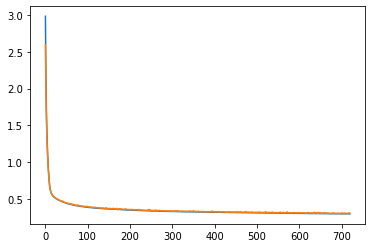

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Custom made ANN

In [67]:
model2 = Sequential()

model2.add(Dense(320,activation='relu',input_dim=X_train.shape[1]))
model2.add(Dense(1,activation='linear'))
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [68]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 320)               3840      
                                                                 
 dense_6 (Dense)             (None, 1)                 321       
                                                                 
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________


In [69]:
model2.compile(loss='mean_squared_error',optimizer= opt)

In [40]:
import time
start = time.time()
history2 = model2.fit(X_train,y_train,epochs=2000,callbacks=callback,batch_size=2500,validation_split=0.2)
print(time.time() - start)

Epoch 1/2000
33/33 [==============================] - 1s 11ms/step - loss: 23.0305 - val_loss: 21.5513
Epoch 2/2000
33/33 [==============================] - 0s 9ms/step - loss: 20.5208 - val_loss: 19.1588
Epoch 3/2000
33/33 [==============================] - 0s 11ms/step - loss: 18.2048 - val_loss: 16.9510
Epoch 4/2000
33/33 [==============================] - 0s 8ms/step - loss: 16.0696 - val_loss: 14.9177
Epoch 5/2000
33/33 [==============================] - 0s 11ms/step - loss: 14.1103 - val_loss: 13.0701
Epoch 6/2000
33/33 [==============================] - 0s 11ms/step - loss: 12.3435 - val_loss: 11.4132
Epoch 7/2000
33/33 [==============================] - 0s 9ms/step - loss: 10.7695 - val_loss: 9.9589
Epoch 8/2000
33/33 [==============================] - 0s 9ms/step - loss: 9.3985 - val_loss: 8.7003
Epoch 9/2000
33/33 [==============================] - 0s 9ms/step - loss: 8.2294 - val_loss: 7.6379
Epoch 10/2000
33/33 [==============================] - 0s 11ms/step - loss: 7.2420 

Epoch 82/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.4858 - val_loss: 0.4945
Epoch 83/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.4809 - val_loss: 0.4896
Epoch 84/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.4762 - val_loss: 0.4852
Epoch 85/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.4718 - val_loss: 0.4811
Epoch 86/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.4675 - val_loss: 0.4767
Epoch 87/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.4634 - val_loss: 0.4728
Epoch 88/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.4595 - val_loss: 0.4690
Epoch 89/2000
33/33 [==============================] - 0s 13ms/step - loss: 0.4557 - val_loss: 0.4653
Epoch 90/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.4520 - val_loss: 0.4618
Epoch 91/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.4486 - val_l

33/33 [==============================] - 0s 9ms/step - loss: 0.3377 - val_loss: 0.3489
Epoch 163/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.3367 - val_loss: 0.3478
Epoch 164/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.3357 - val_loss: 0.3466
Epoch 165/2000
33/33 [==============================] - 0s 13ms/step - loss: 0.3348 - val_loss: 0.3456
Epoch 166/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.3338 - val_loss: 0.3448
Epoch 167/2000
33/33 [==============================] - 0s 11ms/step - loss: 0.3329 - val_loss: 0.3438
Epoch 168/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.3319 - val_loss: 0.3430
Epoch 169/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.3311 - val_loss: 0.3423
Epoch 170/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.3301 - val_loss: 0.3409
Epoch 171/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.3292 - val_loss: 

33/33 [==============================] - 0s 11ms/step - loss: 0.2777 - val_loss: 0.2870
Epoch 243/2000
33/33 [==============================] - 0s 11ms/step - loss: 0.2774 - val_loss: 0.2867
Epoch 244/2000
33/33 [==============================] - 0s 14ms/step - loss: 0.2767 - val_loss: 0.2861
Epoch 245/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2764 - val_loss: 0.2858
Epoch 246/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2759 - val_loss: 0.2852
Epoch 247/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2754 - val_loss: 0.2845
Epoch 248/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2750 - val_loss: 0.2842
Epoch 249/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2745 - val_loss: 0.2838
Epoch 250/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2741 - val_loss: 0.2834
Epoch 251/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2737 - val_loss

33/33 [==============================] - 0s 11ms/step - loss: 0.2550 - val_loss: 0.2637
Epoch 323/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2546 - val_loss: 0.2635
Epoch 324/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2547 - val_loss: 0.2644
Epoch 325/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2545 - val_loss: 0.2631
Epoch 326/2000
33/33 [==============================] - 0s 12ms/step - loss: 0.2543 - val_loss: 0.2633
Epoch 327/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2541 - val_loss: 0.2631
Epoch 328/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2539 - val_loss: 0.2629
Epoch 329/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2537 - val_loss: 0.2630
Epoch 330/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2537 - val_loss: 0.2629
Epoch 331/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2536 - val_lo

Epoch 402/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2466 - val_loss: 0.2568
Epoch 403/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2466 - val_loss: 0.2561
Epoch 404/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2466 - val_loss: 0.2564
Epoch 405/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2468 - val_loss: 0.2562
Epoch 406/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2464 - val_loss: 0.2563
Epoch 407/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2463 - val_loss: 0.2559
Epoch 408/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2465 - val_loss: 0.2564
Epoch 409/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2462 - val_loss: 0.2561
Epoch 410/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2461 - val_loss: 0.2562
Epoch 411/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2

33/33 [==============================] - 0s 9ms/step - loss: 0.2422 - val_loss: 0.2528
Epoch 483/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2422 - val_loss: 0.2524
Epoch 484/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2421 - val_loss: 0.2523
Epoch 485/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2420 - val_loss: 0.2523
Epoch 486/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2420 - val_loss: 0.2523
Epoch 487/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2421 - val_loss: 0.2522
Epoch 488/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2420 - val_loss: 0.2523
Epoch 489/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2419 - val_loss: 0.2522
Epoch 490/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2418 - val_loss: 0.2519
Epoch 491/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2419 - val_loss: 

33/33 [==============================] - 0s 10ms/step - loss: 0.2392 - val_loss: 0.2501
Epoch 563/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2391 - val_loss: 0.2499
Epoch 564/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2391 - val_loss: 0.2499
Epoch 565/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2390 - val_loss: 0.2497
Epoch 566/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2391 - val_loss: 0.2502
Epoch 567/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2390 - val_loss: 0.2498
Epoch 568/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2390 - val_loss: 0.2499
Epoch 569/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2390 - val_loss: 0.2498
Epoch 570/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2390 - val_loss: 0.2505
Epoch 571/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2390 - val_los

33/33 [==============================] - 0s 9ms/step - loss: 0.2370 - val_loss: 0.2483
Epoch 643/2000
33/33 [==============================] - 0s 11ms/step - loss: 0.2369 - val_loss: 0.2486
Epoch 644/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2369 - val_loss: 0.2484
Epoch 645/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2370 - val_loss: 0.2481
Epoch 646/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2369 - val_loss: 0.2481
Epoch 647/2000
33/33 [==============================] - 0s 11ms/step - loss: 0.2368 - val_loss: 0.2484
Epoch 648/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2367 - val_loss: 0.2481
Epoch 649/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2369 - val_loss: 0.2482
Epoch 650/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2367 - val_loss: 0.2480
Epoch 651/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2368 - val_loss:

33/33 [==============================] - 0s 10ms/step - loss: 0.2352 - val_loss: 0.2467
Epoch 723/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2351 - val_loss: 0.2475
Epoch 724/2000
33/33 [==============================] - 0s 12ms/step - loss: 0.2351 - val_loss: 0.2468
Epoch 725/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2350 - val_loss: 0.2472
Epoch 726/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2350 - val_loss: 0.2466
Epoch 727/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2351 - val_loss: 0.2467
Epoch 728/2000
33/33 [==============================] - 0s 11ms/step - loss: 0.2350 - val_loss: 0.2469
Epoch 729/2000
33/33 [==============================] - 0s 11ms/step - loss: 0.2350 - val_loss: 0.2471
Epoch 730/2000
33/33 [==============================] - 0s 12ms/step - loss: 0.2350 - val_loss: 0.2465
Epoch 731/2000
33/33 [==============================] - 0s 11ms/step - loss: 0.2350 - val_

33/33 [==============================] - 0s 9ms/step - loss: 0.2337 - val_loss: 0.2461
Epoch 803/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2336 - val_loss: 0.2458
Epoch 804/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2337 - val_loss: 0.2460
Epoch 805/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2336 - val_loss: 0.2461
Epoch 806/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2339 - val_loss: 0.2464
Epoch 807/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2337 - val_loss: 0.2460
Epoch 808/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2336 - val_loss: 0.2460
Epoch 809/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2335 - val_loss: 0.2460
Epoch 810/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2336 - val_loss: 0.2462
Epoch 811/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2337 - val_loss: 0.

33/33 [==============================] - 0s 9ms/step - loss: 0.2325 - val_loss: 0.2452
Epoch 883/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2325 - val_loss: 0.2451
Epoch 884/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2324 - val_loss: 0.2452
Epoch 885/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2325 - val_loss: 0.2453
Epoch 886/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2324 - val_loss: 0.2452
Epoch 887/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2326 - val_loss: 0.2453
Epoch 888/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2323 - val_loss: 0.2452
Epoch 889/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2324 - val_loss: 0.2451
Epoch 890/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2325 - val_loss: 0.2454
Epoch 891/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2324 - val_loss: 0.

33/33 [==============================] - 0s 10ms/step - loss: 0.2315 - val_loss: 0.2447
Epoch 963/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2314 - val_loss: 0.2445
Epoch 964/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2313 - val_loss: 0.2444
Epoch 965/2000
33/33 [==============================] - 0s 11ms/step - loss: 0.2315 - val_loss: 0.2456
Epoch 966/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2317 - val_loss: 0.2446
Epoch 967/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2312 - val_loss: 0.2446
Epoch 968/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2314 - val_loss: 0.2444
Epoch 969/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2314 - val_loss: 0.2446
Epoch 970/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2313 - val_loss: 0.2447
Epoch 971/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2315 - val_loss

33/33 [==============================] - 0s 9ms/step - loss: 0.2305 - val_loss: 0.2443
Epoch 1042/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2305 - val_loss: 0.2439
Epoch 1043/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2305 - val_loss: 0.2441
Epoch 1044/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2305 - val_loss: 0.2443
Epoch 1045/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2304 - val_loss: 0.2439
Epoch 1046/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2303 - val_loss: 0.2442
Epoch 1047/2000
33/33 [==============================] - 0s 11ms/step - loss: 0.2305 - val_loss: 0.2437
Epoch 1048/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2304 - val_loss: 0.2441
Epoch 1049/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2304 - val_loss: 0.2443
Epoch 1050/2000
33/33 [==============================] - 0s 10ms/step - loss: 0.2306

33/33 [==============================] - 0s 9ms/step - loss: 0.2297 - val_loss: 0.2435
Epoch 1121/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2298 - val_loss: 0.2434
Epoch 1122/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2298 - val_loss: 0.2437
Epoch 1123/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2297 - val_loss: 0.2439
Epoch 1124/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2298 - val_loss: 0.2435
Epoch 1125/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2295 - val_loss: 0.2437
Epoch 1126/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2298 - val_loss: 0.2433
Epoch 1127/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2298 - val_loss: 0.2435
Epoch 1128/2000
33/33 [==============================] - 0s 8ms/step - loss: 0.2297 - val_loss: 0.2435
Epoch 1129/2000
33/33 [==============================] - 0s 9ms/step - loss: 0.2297 - val

In [41]:
y_pred2= model2.predict(X_test)
r2_score(y_test,y_pred2)

1049/1049 [==============================] - 1s 945us/step


0.9660400125063358

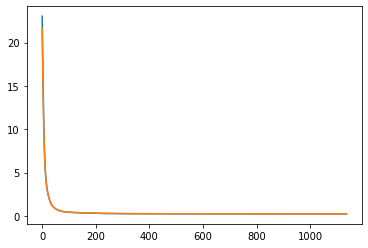

In [42]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

#### Model3

In [43]:
model3 = Sequential()

model3.add(Dense(416,activation='tanh',input_dim=X_train.shape[1]))
model3.add(Dense(416,activation='sigmoid'))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(32,activation='relu'))


model3.add(Dense(1,activation='linear'))
opt = keras.optimizers.Adam(learning_rate=0.0001)

In [44]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               2304      
                                                                 
 dense_1 (Dense)             (None, 416)               80288     
                                                                 
 dense_2 (Dense)             (None, 448)               186816    
                                                                 
 dense_3 (Dense)             (None, 32)                14368     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1

In [45]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [46]:
model3.compile(loss='mean_squared_error',optimizer= opt)

In [47]:
import time
start = time.time()
history3 = model3.fit(X_train,y_train,epochs=500,callbacks=callback,batch_size=6000,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
14/14 [==============================] - 2s 82ms/step - loss: 27.5374 - val_loss: 24.6827
Epoch 2/500
14/14 [==============================] - 1s 74ms/step - loss: 22.5423 - val_loss: 19.4636
Epoch 3/500
14/14 [==============================] - 1s 90ms/step - loss: 17.3011 - val_loss: 14.5241
Epoch 4/500
14/14 [==============================] - 1s 91ms/step - loss: 12.7777 - val_loss: 10.5532
Epoch 5/500
14/14 [==============================] - 1s 83ms/step - loss: 9.1382 - val_loss: 7.3688
Epoch 6/500
14/14 [==============================] - 2s 117ms/step - loss: 6.2791 - val_loss: 4.9804
Epoch 7/500
14/14 [==============================] - 1s 80ms/step - loss: 4.2348 - val_loss: 3.4126
Epoch 8/500
14/14 [==============================] - 2s 117ms/step - loss: 2.9690 - val_loss: 2.5346
Epoch 9/500
14/14 [==============================] - 1s 77ms/step - loss: 2.2979 - val_loss: 2.1066
Epoch 10/500
14/14 [==============================] - 1s 95ms/step - loss: 1.9783 - val_lo

14/14 [==============================] - 1s 98ms/step - loss: 0.4408 - val_loss: 0.4515
Epoch 83/500
14/14 [==============================] - 1s 85ms/step - loss: 0.4383 - val_loss: 0.4495
Epoch 84/500
14/14 [==============================] - 1s 86ms/step - loss: 0.4358 - val_loss: 0.4463
Epoch 85/500
14/14 [==============================] - 1s 76ms/step - loss: 0.4335 - val_loss: 0.4439
Epoch 86/500
14/14 [==============================] - 1s 99ms/step - loss: 0.4311 - val_loss: 0.4414
Epoch 87/500
14/14 [==============================] - 1s 89ms/step - loss: 0.4289 - val_loss: 0.4392
Epoch 88/500
14/14 [==============================] - 1s 89ms/step - loss: 0.4266 - val_loss: 0.4368
Epoch 89/500
14/14 [==============================] - 1s 91ms/step - loss: 0.4245 - val_loss: 0.4344
Epoch 90/500
14/14 [==============================] - 1s 76ms/step - loss: 0.4220 - val_loss: 0.4318
Epoch 91/500
14/14 [==============================] - 1s 90ms/step - loss: 0.4199 - val_loss: 0.4295
Epo

14/14 [==============================] - 1s 78ms/step - loss: 0.2663 - val_loss: 0.2711
Epoch 163/500
14/14 [==============================] - 1s 81ms/step - loss: 0.2658 - val_loss: 0.2698
Epoch 164/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2654 - val_loss: 0.2697
Epoch 165/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2651 - val_loss: 0.2700
Epoch 166/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2647 - val_loss: 0.2686
Epoch 167/500
14/14 [==============================] - 1s 76ms/step - loss: 0.2645 - val_loss: 0.2681
Epoch 168/500
14/14 [==============================] - 1s 79ms/step - loss: 0.2642 - val_loss: 0.2678
Epoch 169/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2637 - val_loss: 0.2694
Epoch 170/500
14/14 [==============================] - 1s 79ms/step - loss: 0.2635 - val_loss: 0.2678
Epoch 171/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2629 - val_loss: 0

14/14 [==============================] - 1s 76ms/step - loss: 0.2518 - val_loss: 0.2567
Epoch 243/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2519 - val_loss: 0.2577
Epoch 244/500
14/14 [==============================] - 1s 75ms/step - loss: 0.2520 - val_loss: 0.2571
Epoch 245/500
14/14 [==============================] - 1s 75ms/step - loss: 0.2519 - val_loss: 0.2567
Epoch 246/500
14/14 [==============================] - 1s 74ms/step - loss: 0.2523 - val_loss: 0.2568
Epoch 247/500
14/14 [==============================] - 1s 79ms/step - loss: 0.2522 - val_loss: 0.2568
Epoch 248/500
14/14 [==============================] - 1s 74ms/step - loss: 0.2514 - val_loss: 0.2576
Epoch 249/500
14/14 [==============================] - 1s 76ms/step - loss: 0.2519 - val_loss: 0.2565
Epoch 250/500
14/14 [==============================] - 1s 76ms/step - loss: 0.2514 - val_loss: 0.2566
Epoch 251/500
14/14 [==============================] - 1s 76ms/step - loss: 0.2511 - val_loss: 0

14/14 [==============================] - 1s 77ms/step - loss: 0.2464 - val_loss: 0.2531
Epoch 323/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2466 - val_loss: 0.2530
Epoch 324/500
14/14 [==============================] - 1s 76ms/step - loss: 0.2464 - val_loss: 0.2537
Epoch 325/500
14/14 [==============================] - 1s 76ms/step - loss: 0.2465 - val_loss: 0.2540
Epoch 326/500
14/14 [==============================] - 1s 76ms/step - loss: 0.2465 - val_loss: 0.2531
Epoch 327/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2465 - val_loss: 0.2537
Epoch 328/500
14/14 [==============================] - 1s 78ms/step - loss: 0.2464 - val_loss: 0.2542
Epoch 329/500
14/14 [==============================] - 1s 75ms/step - loss: 0.2465 - val_loss: 0.2535
Epoch 330/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2460 - val_loss: 0.2530
Epoch 331/500
14/14 [==============================] - 1s 75ms/step - loss: 0.2460 - val_loss: 0

14/14 [==============================] - 1s 78ms/step - loss: 0.2426 - val_loss: 0.2503
Epoch 403/500
14/14 [==============================] - 1s 78ms/step - loss: 0.2423 - val_loss: 0.2508
Epoch 404/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2424 - val_loss: 0.2508
Epoch 405/500
14/14 [==============================] - 1s 76ms/step - loss: 0.2425 - val_loss: 0.2499
Epoch 406/500
14/14 [==============================] - 1s 94ms/step - loss: 0.2427 - val_loss: 0.2508
Epoch 407/500
14/14 [==============================] - 1s 100ms/step - loss: 0.2423 - val_loss: 0.2501
Epoch 408/500
14/14 [==============================] - 1s 85ms/step - loss: 0.2430 - val_loss: 0.2504
Epoch 409/500
14/14 [==============================] - 1s 83ms/step - loss: 0.2426 - val_loss: 0.2504
Epoch 410/500
14/14 [==============================] - 1s 87ms/step - loss: 0.2424 - val_loss: 0.2511
Epoch 411/500
14/14 [==============================] - 1s 98ms/step - loss: 0.2423 - val_loss: 

14/14 [==============================] - 1s 84ms/step - loss: 0.2394 - val_loss: 0.2479
Epoch 483/500
14/14 [==============================] - 1s 83ms/step - loss: 0.2392 - val_loss: 0.2478
Epoch 484/500
14/14 [==============================] - 1s 80ms/step - loss: 0.2391 - val_loss: 0.2471
Epoch 485/500
14/14 [==============================] - 1s 89ms/step - loss: 0.2391 - val_loss: 0.2478
Epoch 486/500
14/14 [==============================] - 1s 101ms/step - loss: 0.2391 - val_loss: 0.2483
Epoch 487/500
14/14 [==============================] - 1s 86ms/step - loss: 0.2395 - val_loss: 0.2478
Epoch 488/500
14/14 [==============================] - 1s 81ms/step - loss: 0.2388 - val_loss: 0.2468
Epoch 489/500
14/14 [==============================] - 1s 77ms/step - loss: 0.2390 - val_loss: 0.2474
Epoch 490/500
14/14 [==============================] - 1s 76ms/step - loss: 0.2390 - val_loss: 0.2477
Epoch 491/500
14/14 [==============================] - 1s 75ms/step - loss: 0.2394 - val_loss: 

In [48]:
y_pred3= model.predict(X_test)
r2_score(y_test,y_pred3)

1049/1049 [==============================] - 2s 2ms/step


0.9618875409733068

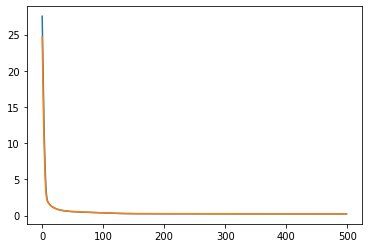

In [49]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])